In [18]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
from fastai.text import *

In [20]:
bs = 256
bptt = 35

In [21]:
dat = (TextList.from_folder('')
            .split_by_files('valid.txt')
            .label_for_lm()           
            .databunch(bs=bs, num_workers=1))

In [6]:
dat.save('data_tnh')

In [8]:
# [] list has some method
# voc.itos is a list so it has those default method

In [ ]:
dat.train_ds

In [ ]:
dat.valid_ds

In [25]:
# need to avoid using \n when not end of line
dat.show_batch()

In [33]:
learn = language_model_learner(dat, AWD_LSTM, drop_mult=0.3).to_fp16()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


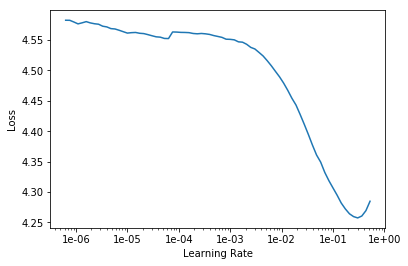

In [28]:
learn.recorder.plot(skip_end=15)

In [29]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

In [31]:
learn.save('stage1')

In [34]:
learn.load('stage1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (1 items)
x: LMTextList
xxbos xxunk xxmaj contents 
  xxmaj notes on xxmaj eating 7 
  xxmaj contemplations for xxmaj eating 95 
 
 
 
 
  xxup notes xxup on xxup eating 
 
  xxmaj mindful xxmaj eating 
  xxmaj to cultivate mindfulness , we can do the same 
  things we always do — walking , sitting , working , 
  eating , and so on — with mindful awareness 
  of what we are doing . xxmaj when we ’re eating , we 
  know that we are eating . xxmaj when we open a 
  door , we know that we ’re opening a door . xxmaj our 
  mind is with our actions . 
  xxmaj when you put a piece of fruit into your 
  mouth , all you need is a little bit of mindfulness 
  to be aware : “ i am putting a piece of apple 
  in my mouth . ” xxmaj your mind does n’t need to be 
  somewhere else . xxmaj if you ’re thinking of work while 
  you chew , that ’s not eating mindfully . xxmaj when you 
  pay attention to the apple , that is mindfulness . 
  xxmaj t

In [32]:
learn1 = load_learner('models', 'stage1.pth')

KeyError: 'data'

In [27]:
learn.unfreeze()

In [28]:
learn.fit_one_cycle(3, 1e-6, moms=(0.8,0.7))

In [29]:
learn.export('../viriya_deploy/tnh.pkl')

In [30]:
TEXT = "Practicing Concentration"
N_WORDS = 100
N_SENTENCES = 5

In [18]:
print(learn.beam_search('Practicing Concentration', n_words=20, beam_sz=20))

Practicing Concentration Practicing Concentration , Understanding , and Understanding . 
  The Five Realizations of the Four


In [31]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Practicing Concentration on Life Work You Do Perform Thing Right Now , Part 2 of the U.S. Department of Energy 's Department of Environmental Science , New York , CA , 0 - 28 of the 2001 U.S. Summer College of Science and Technology Foundation , Congress , Washington , DC : CA and THE U.S. Department of Agriculture , India , National Research Council of
Practicing Concentration Camps on English Language , English , and English , Vietnamese language , English , French , French , and English , French , French , English , and French , each language has been English for many years . The French were not part of the German Army , which was the French army during the Second World War . These French - speaking French - speaking kingdoms made use of German
Practicing Concentration Camps and Walking Meditation , Despise US , and Breathing in Water , Done for Peace , Joy - Day and Peace . Minute Seven of Peace Day , May 27 , 2006 , The Daily Mail reported that Practicing Breathing A Few Hours , a